<a href="https://colab.research.google.com/github/omar-shaaban742001/computer_vison_pytorch/blob/master/YOLO8_construction_site.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting start

In [8]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import zipfile
from pathlib import Path
import os

# Uzip the dataset

In [9]:
# Define the data path
data_path = Path("data/")
data_path.mkdir(parents=True , exist_ok = True)

#unzip the data into the data path
with zipfile.ZipFile ("/content/drive/MyDrive/Colab Notebooks/datasets/Health and Safety PPE Compliance.v8i.yolov8.zip", 'r') as zip_ref:
  # Extractall in data path
  zip_ref.extractall(data_path)




## Train YOLO8

In [10]:
# Set up yolo8
!pip install ultralytics

In [11]:
from ultralytics import YOLO

In [12]:
!yolo task= detect mode = train model=yolov8m.pt data="/content/data/data.yaml" epochs=50

Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/data/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo


image 1/1 /content/data/test/images/00000009_jpg.rf.56e768242657724a6fea4eaa7febf690.jpg: 384x640 1 vest, 25.8ms
Speed: 1.5ms preprocess, 25.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


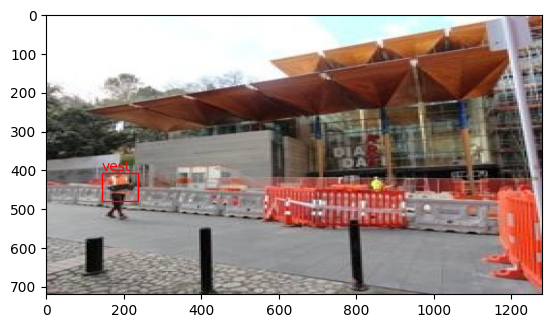

In [38]:
import matplotlib.patches as patches
from PIL import Image

model = YOLO("/content/runs/detect/train3/weights/best.pt")
image_path = "/content/data/test/images/00000009_jpg.rf.56e768242657724a6fea4eaa7febf690.jpg"
results = model(image_path)
img = Image.open(image_path)
classNames = ['hat', 'no hat', 'no vest', 'vest']

for r in results:
  boxes = r.boxes
  for box in boxes:
    x1, y1, x2, y2 = box.xyxy[0]
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    cls = int(box.cls[0])

    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(img)

    # Create a rectangle patch
    rectangle = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')

    # Add the rectangle patch to the axes
    ax.add_patch(rectangle)

    box_name = f"{classNames[cls]}"
    ax.text(x1, y1 - 5, box_name, color='r')

    # Show the plot
    plt.show()